In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')
img = cv2.imread("/content/drive/My Drive/Colab Notebooks/image_processing/Lenna.bmp")
print(img.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(512, 512, 3)


In [ ]:
nr, nc = img.shape[:2]
x0 = nr // 2
y0 = nc // 2
sigma = 200
illumination = np.zeros([nr, nc], dtype = 'float32')
print(illumination.shape)
for x in range(nr):
    for y in range(nc):
        illumination[x, y] = np.exp( -(( x - x0) ** 2 + (y - y0) ** 2) / (2 * sigma * sigma))

(512, 512)


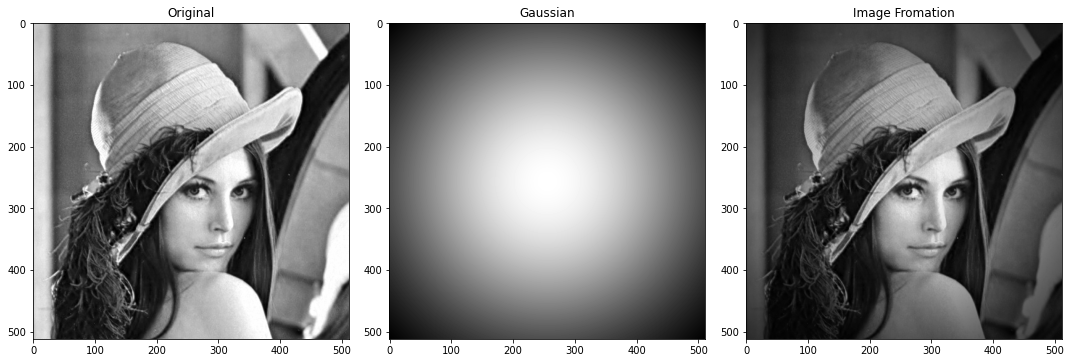

In [ ]:
new_img = img.copy()
for x in range(nr):
    for y in range(nc):
        for k in range(3):
            val = round(illumination[x, y] * img[x, y, k])
            new_img[x, y, k] = np.uint8(val)
images = [img, illumination, new_img]
titles = ['Original', 'Gaussian', 'Image Fromation']
plt.figure(figsize = (15, 15))

for i in range(3):
    plt.subplot(1, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])

plt.tight_layout()
plt.show()